In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Phase 1

In [15]:
# Đọc dữ liệu
df1 = pd.read_csv('/kaggle/input/final-data/phase1/user_train_phase_1.csv')

🔍 Completeness theo từng object (ví dụ 10 dòng đầu):
0     98.529412
1    100.000000
2    100.000000
3    100.000000
4    100.000000
5    100.000000
6    100.000000
7    100.000000
8    100.000000
9    100.000000
dtype: float64

📊 Completeness toàn bộ dataset: 99.16%


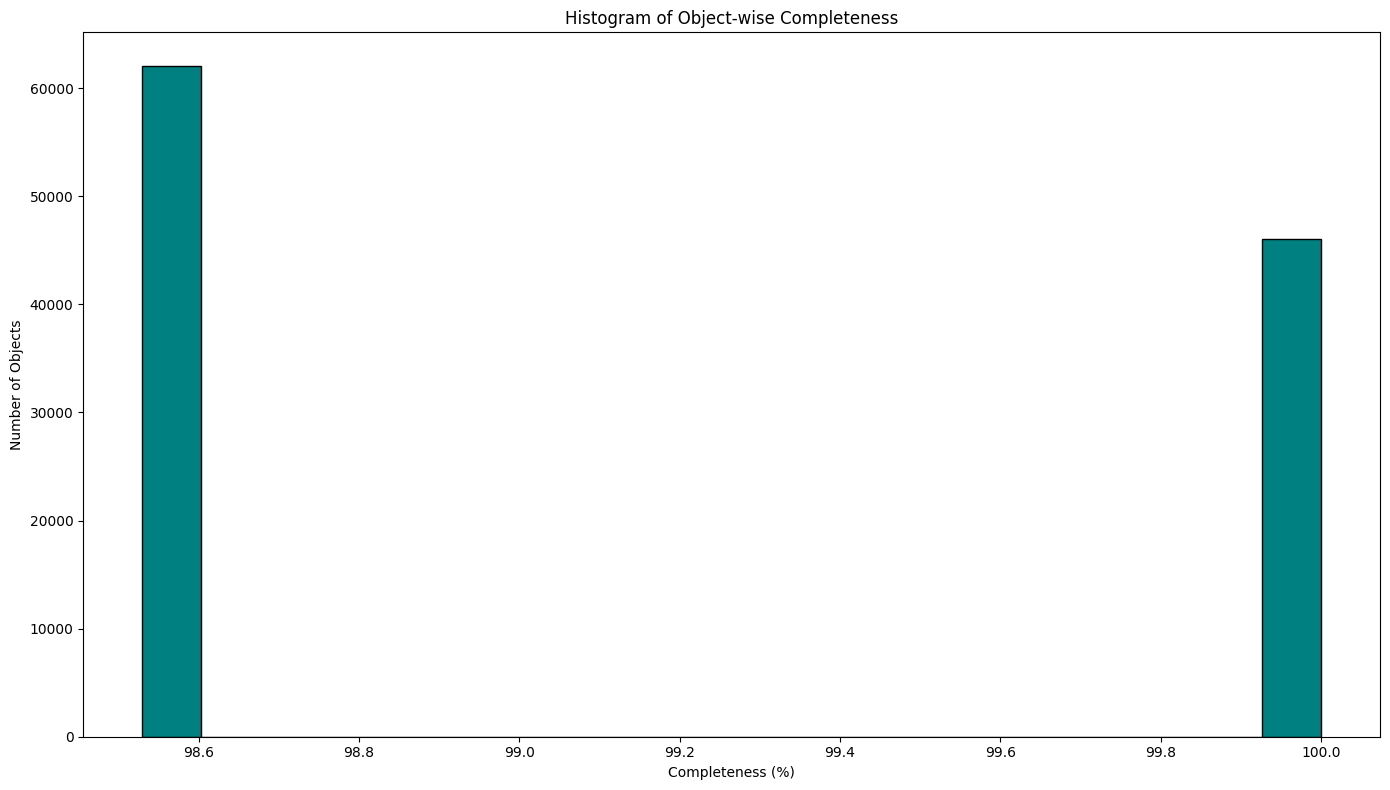

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Tổng số thuộc tính (cột)
total_columns = df1.shape[1]

# a. Tính completeness cho từng object (theo dòng)
object_completeness = df1.notnull().sum(axis=1) / total_columns * 100

# b. Tính completeness toàn bộ dataset
dataset_completeness = object_completeness.mean()

# ✅ In kết quả
print("🔍 Completeness theo từng object (ví dụ 10 dòng đầu):")
print(object_completeness.head(10))

print(f"\n📊 Completeness toàn bộ dataset: {dataset_completeness:.2f}%")

# (Tùy chọn) Vẽ biểu đồ histogram
plt.figure(figsize=(14, 8))
plt.hist(object_completeness, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Object-wise Completeness')
plt.xlabel('Completeness (%)')
plt.ylabel('Number of Objects')
plt.tight_layout()
plt.show()


📊 AUC-ROC per feature (Relevance):
total_score                         1.000000
exercise_perc_real_score_sum_1      0.608345
exercise_correct_sum_1              0.608138
exercise_perc_real_score_mean_1     0.602467
total_words_phase1                  0.599964
                                      ...   
start_year                          0.478836
exercise_perc_real_score_std_1      0.470034
exercise_perc_real_correct_std_1    0.469191
exercise_diff_min_1                 0.464494
exercise_context_mean_1             0.456278
Length: 63, dtype: float64


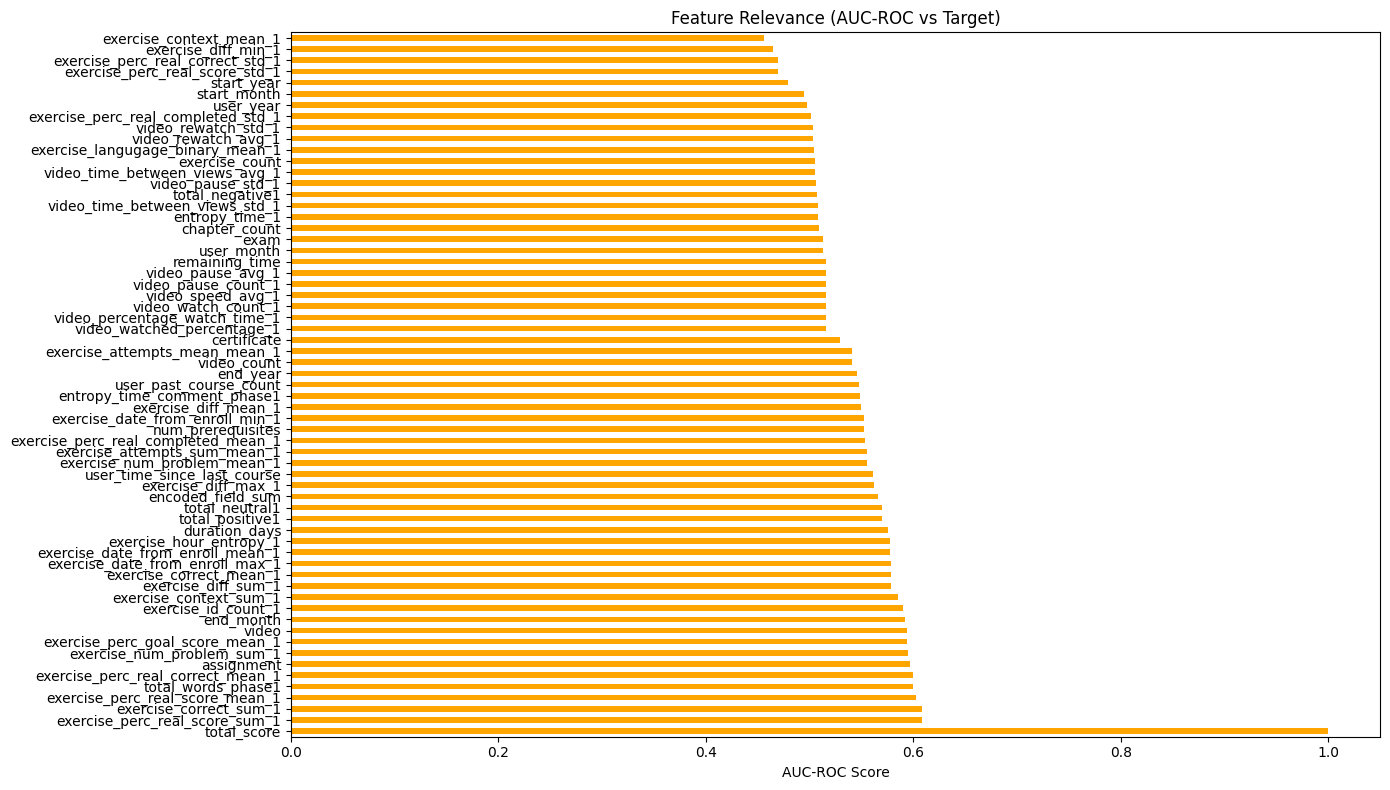

In [17]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np


target_col = 'label_encoded'  # sửa lại tên nếu khác

# Loại bỏ dòng null
df1_clean = df1.dropna()

# Chia X và y
X = df1_clean.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
y = df1_clean[target_col]

# Binarize target nếu không phải nhị phân
if len(np.unique(y)) > 2:
    from sklearn.preprocessing import label_binarize
    y_bin = label_binarize(y, classes=np.unique(y))[:, 0]
else:
    y_bin = y

# Tính AUC cho từng cột
auc_scores = {}
for col in X.columns:
    X_col = X[[col]]
    try:
        model = LogisticRegression()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        aucs = []

        for train_idx, test_idx in cv.split(X_col, y_bin):
            model.fit(X_col.iloc[train_idx], y_bin[train_idx])
            probs = model.predict_proba(X_col.iloc[test_idx])[:, 1]
            auc = roc_auc_score(y_bin[test_idx], probs)
            aucs.append(auc)

        auc_scores[col] = np.mean(aucs)
    except Exception as e:
        auc_scores[col] = np.nan
        print(f"⚠️ AUC fail on column {col}: {e}")

# In kết quả
sorted_auc = pd.Series(auc_scores).sort_values(ascending=False)
print("📊 AUC-ROC per feature (Relevance):")
print(sorted_auc)

# (Tùy chọn) Biểu đồ
import matplotlib.pyplot as plt
sorted_auc.plot(kind='barh', figsize=(14, 8), color='orange')
plt.title('Feature Relevance (AUC-ROC vs Target)')
plt.xlabel('AUC-ROC Score')
plt.tight_layout()
plt.show()


# Phase 2

In [18]:
# Đọc dữ liệu
df2 = pd.read_csv('/kaggle/input/final-data/phase2/user_train_phase_2.csv')

🔍 Completeness theo từng object (ví dụ 10 dòng đầu):
0     99.099099
1    100.000000
2    100.000000
3    100.000000
4    100.000000
5    100.000000
6    100.000000
7    100.000000
8    100.000000
9    100.000000
dtype: float64

📊 Completeness toàn bộ dataset: 99.49%


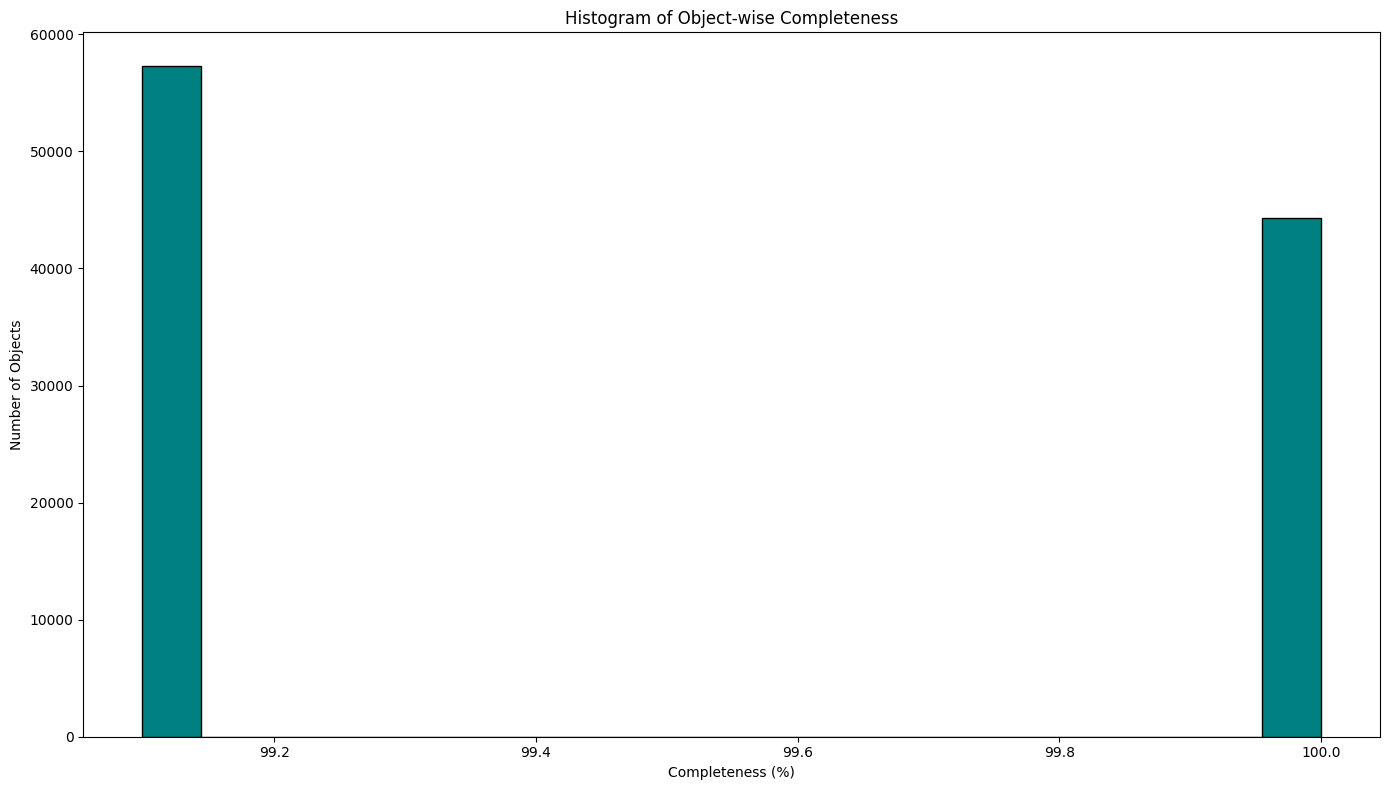

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Tổng số thuộc tính (cột)
total_columns = df2.shape[1]

# a. Tính completeness cho từng object (theo dòng)
object_completeness = df2.notnull().sum(axis=1) / total_columns * 100

# b. Tính completeness toàn bộ dataset
dataset_completeness = object_completeness.mean()

# ✅ In kết quả
print("🔍 Completeness theo từng object (ví dụ 10 dòng đầu):")
print(object_completeness.head(10))

print(f"\n📊 Completeness toàn bộ dataset: {dataset_completeness:.2f}%")

# (Tùy chọn) Vẽ biểu đồ histogram
plt.figure(figsize=(14, 8))
plt.hist(object_completeness, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Object-wise Completeness')
plt.xlabel('Completeness (%)')
plt.ylabel('Number of Objects')
plt.tight_layout()
plt.show()


📊 AUC-ROC per feature (Relevance):
total_score                         1.000000
exercise_perc_real_score_sum_1      0.604195
exercise_correct_sum_1              0.603320
assignment                          0.602370
video                               0.599462
                                      ...   
exercise_diff_min_1                 0.483087
start_year                          0.481111
exercise_perc_real_correct_std_1    0.467596
exercise_context_mean_1             0.459294
exercise_perc_real_score_std_1      0.458247
Length: 106, dtype: float64


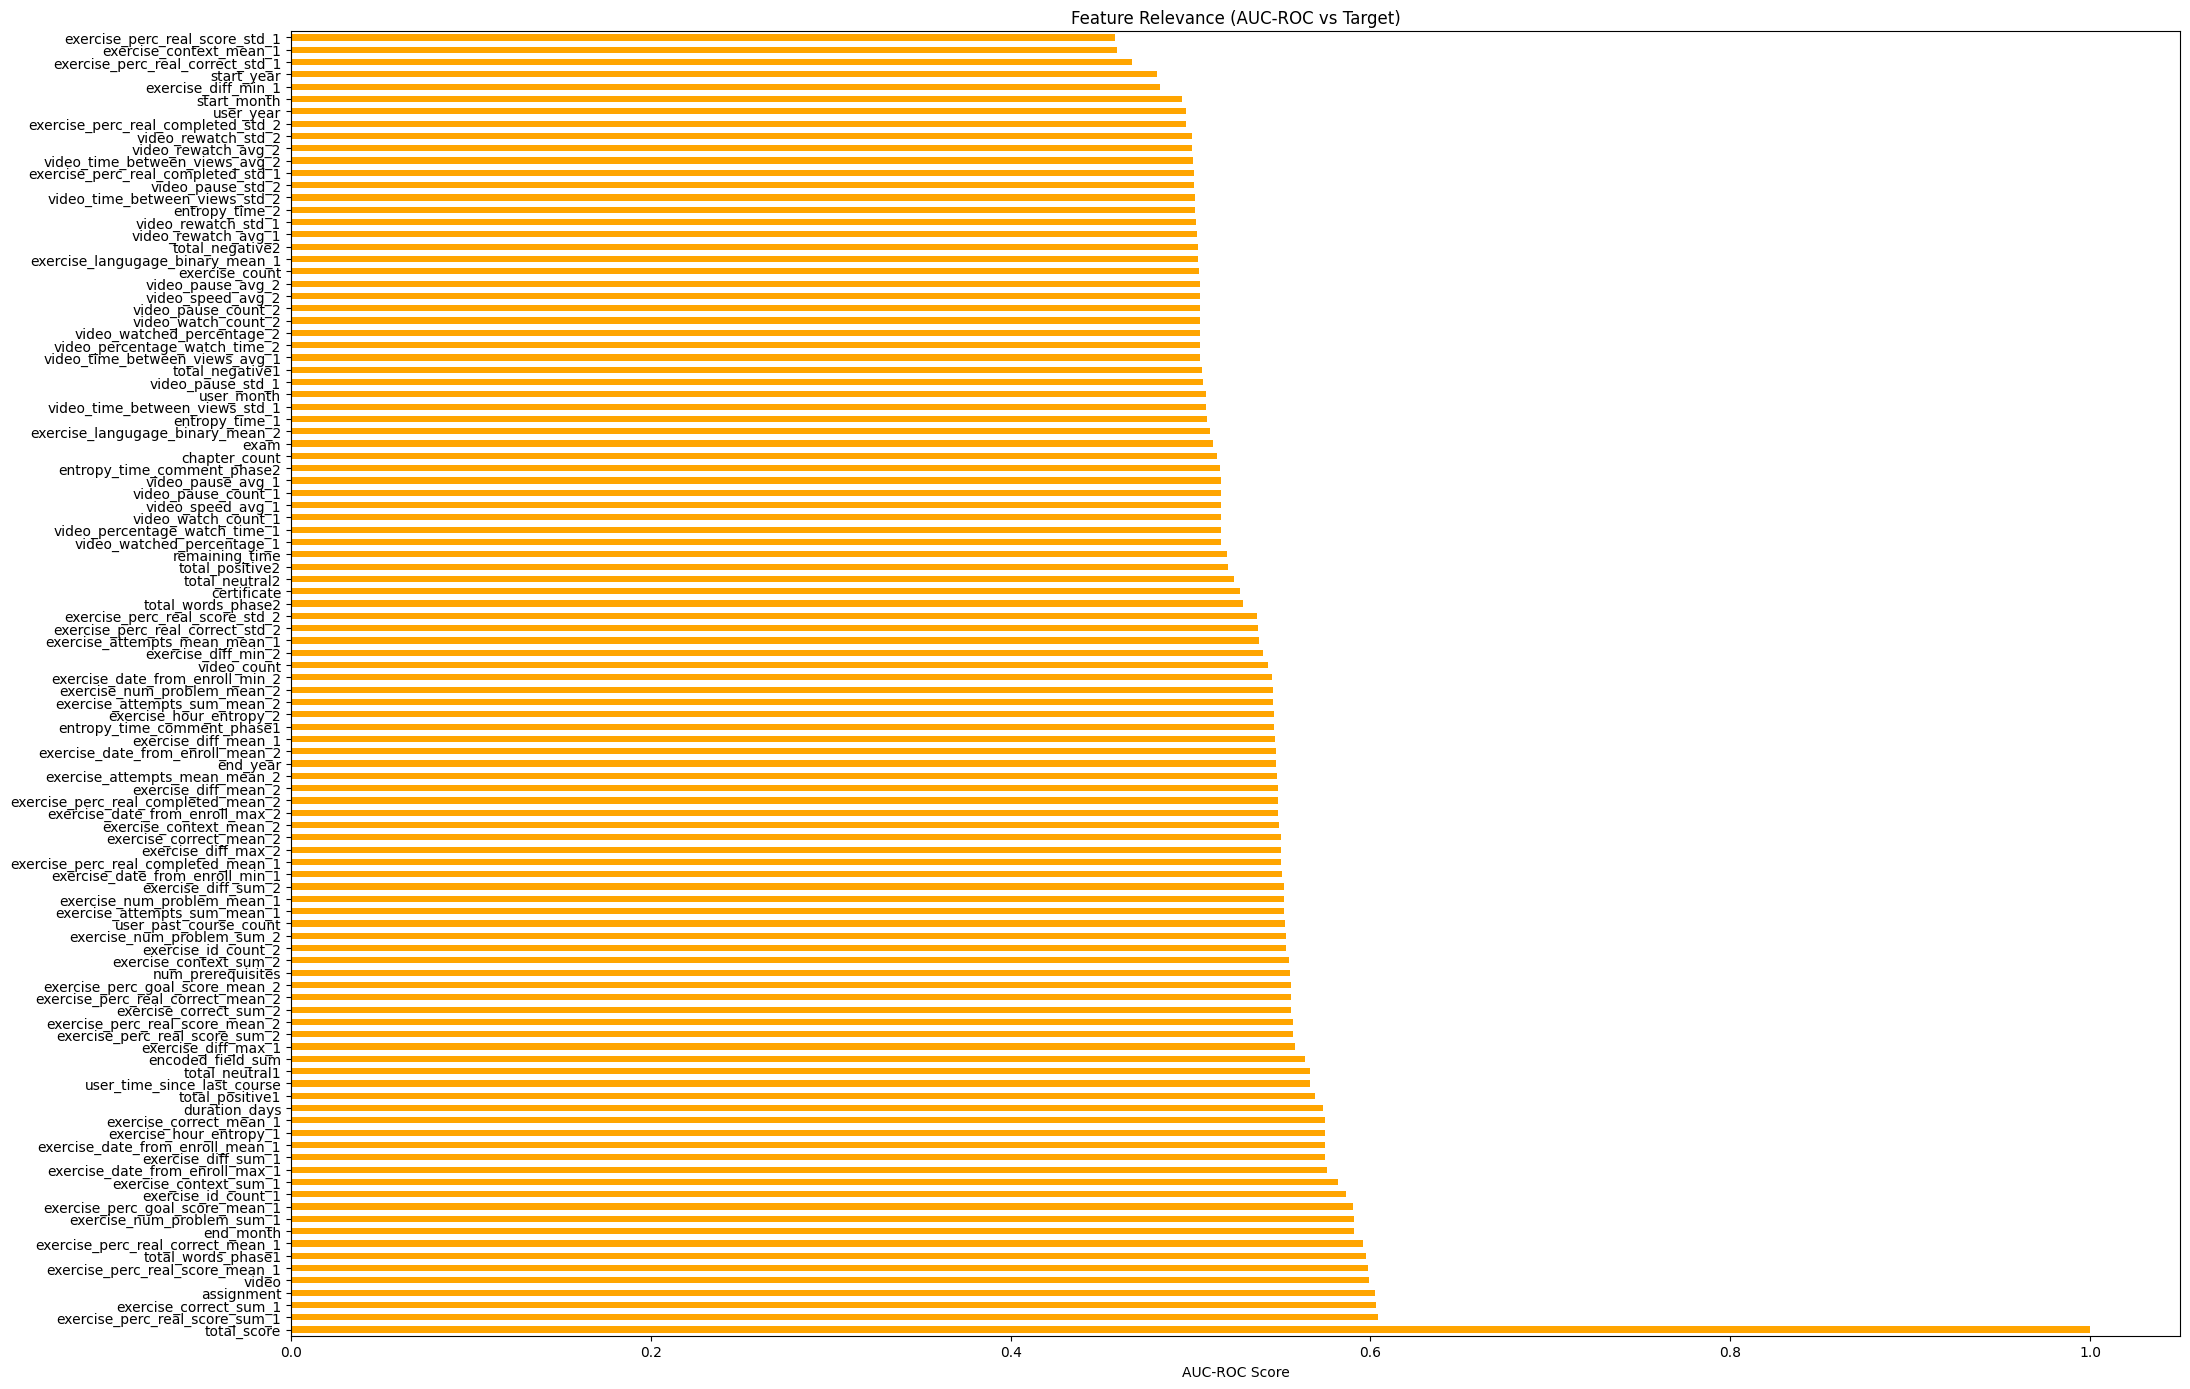

In [20]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np


target_col = 'label_encoded'  # sửa lại tên nếu khác

# Loại bỏ dòng null
df2_clean = df2.dropna()

# Chia X và y
X = df2_clean.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
y = df2_clean[target_col]

# Binarize target nếu không phải nhị phân
if len(np.unique(y)) > 2:
    from sklearn.preprocessing import label_binarize
    y_bin = label_binarize(y, classes=np.unique(y))[:, 0]
else:
    y_bin = y

# Tính AUC cho từng cột
auc_scores = {}
for col in X.columns:
    X_col = X[[col]]
    try:
        model = LogisticRegression()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        aucs = []

        for train_idx, test_idx in cv.split(X_col, y_bin):
            model.fit(X_col.iloc[train_idx], y_bin[train_idx])
            probs = model.predict_proba(X_col.iloc[test_idx])[:, 1]
            auc = roc_auc_score(y_bin[test_idx], probs)
            aucs.append(auc)

        auc_scores[col] = np.mean(aucs)
    except Exception as e:
        auc_scores[col] = np.nan
        print(f"⚠️ AUC fail on column {col}: {e}")

# In kết quả
sorted_auc = pd.Series(auc_scores).sort_values(ascending=False)
print("📊 AUC-ROC per feature (Relevance):")
print(sorted_auc)

# (Tùy chọn) Biểu đồ
import matplotlib.pyplot as plt
sorted_auc.plot(kind='barh', figsize=(22, 14), color='orange')
plt.title('Feature Relevance (AUC-ROC vs Target)')
plt.xlabel('AUC-ROC Score')
plt.tight_layout()
plt.show()


# Phase 3

In [21]:
# Đọc dữ liệu
df3 = pd.read_csv('/kaggle/input/final-data/phase3/user_train_phase_3.csv')

🔍 Completeness theo từng object (ví dụ 10 dòng đầu):
0     99.350649
1    100.000000
2    100.000000
3    100.000000
4    100.000000
5    100.000000
6    100.000000
7    100.000000
8    100.000000
9     99.350649
dtype: float64

📊 Completeness toàn bộ dataset: 99.64%


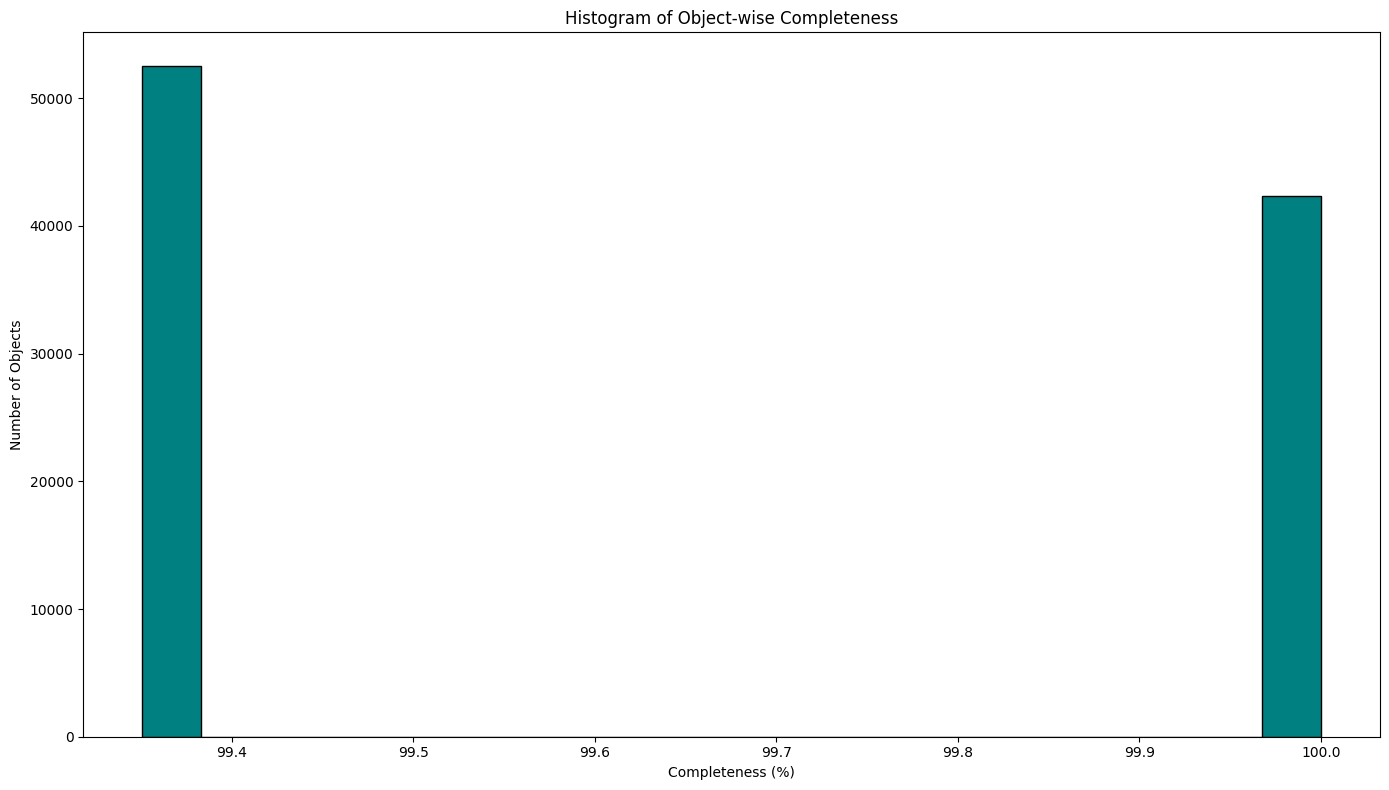

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Tổng số thuộc tính (cột)
total_columns = df3.shape[1]

# a. Tính completeness cho từng object (theo dòng)
object_completeness = df3.notnull().sum(axis=1) / total_columns * 100

# b. Tính completeness toàn bộ dataset
dataset_completeness = object_completeness.mean()

# ✅ In kết quả
print("🔍 Completeness theo từng object (ví dụ 10 dòng đầu):")
print(object_completeness.head(10))

print(f"\n📊 Completeness toàn bộ dataset: {dataset_completeness:.2f}%")

# (Tùy chọn) Vẽ biểu đồ histogram
plt.figure(figsize=(14, 8))
plt.hist(object_completeness, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Object-wise Completeness')
plt.xlabel('Completeness (%)')
plt.ylabel('Number of Objects')
plt.tight_layout()
plt.show()


📊 AUC-ROC per feature (Relevance):
total_score                         1.000000
assignment                          0.607792
video                               0.606986
exercise_perc_real_score_sum_1      0.597216
total_words_phase1                  0.596465
                                      ...   
exercise_diff_min_1                 0.485846
start_year                          0.482234
exercise_perc_real_score_std_1      0.463257
exercise_perc_real_correct_std_1    0.461394
exercise_context_mean_1             0.461238
Length: 149, dtype: float64


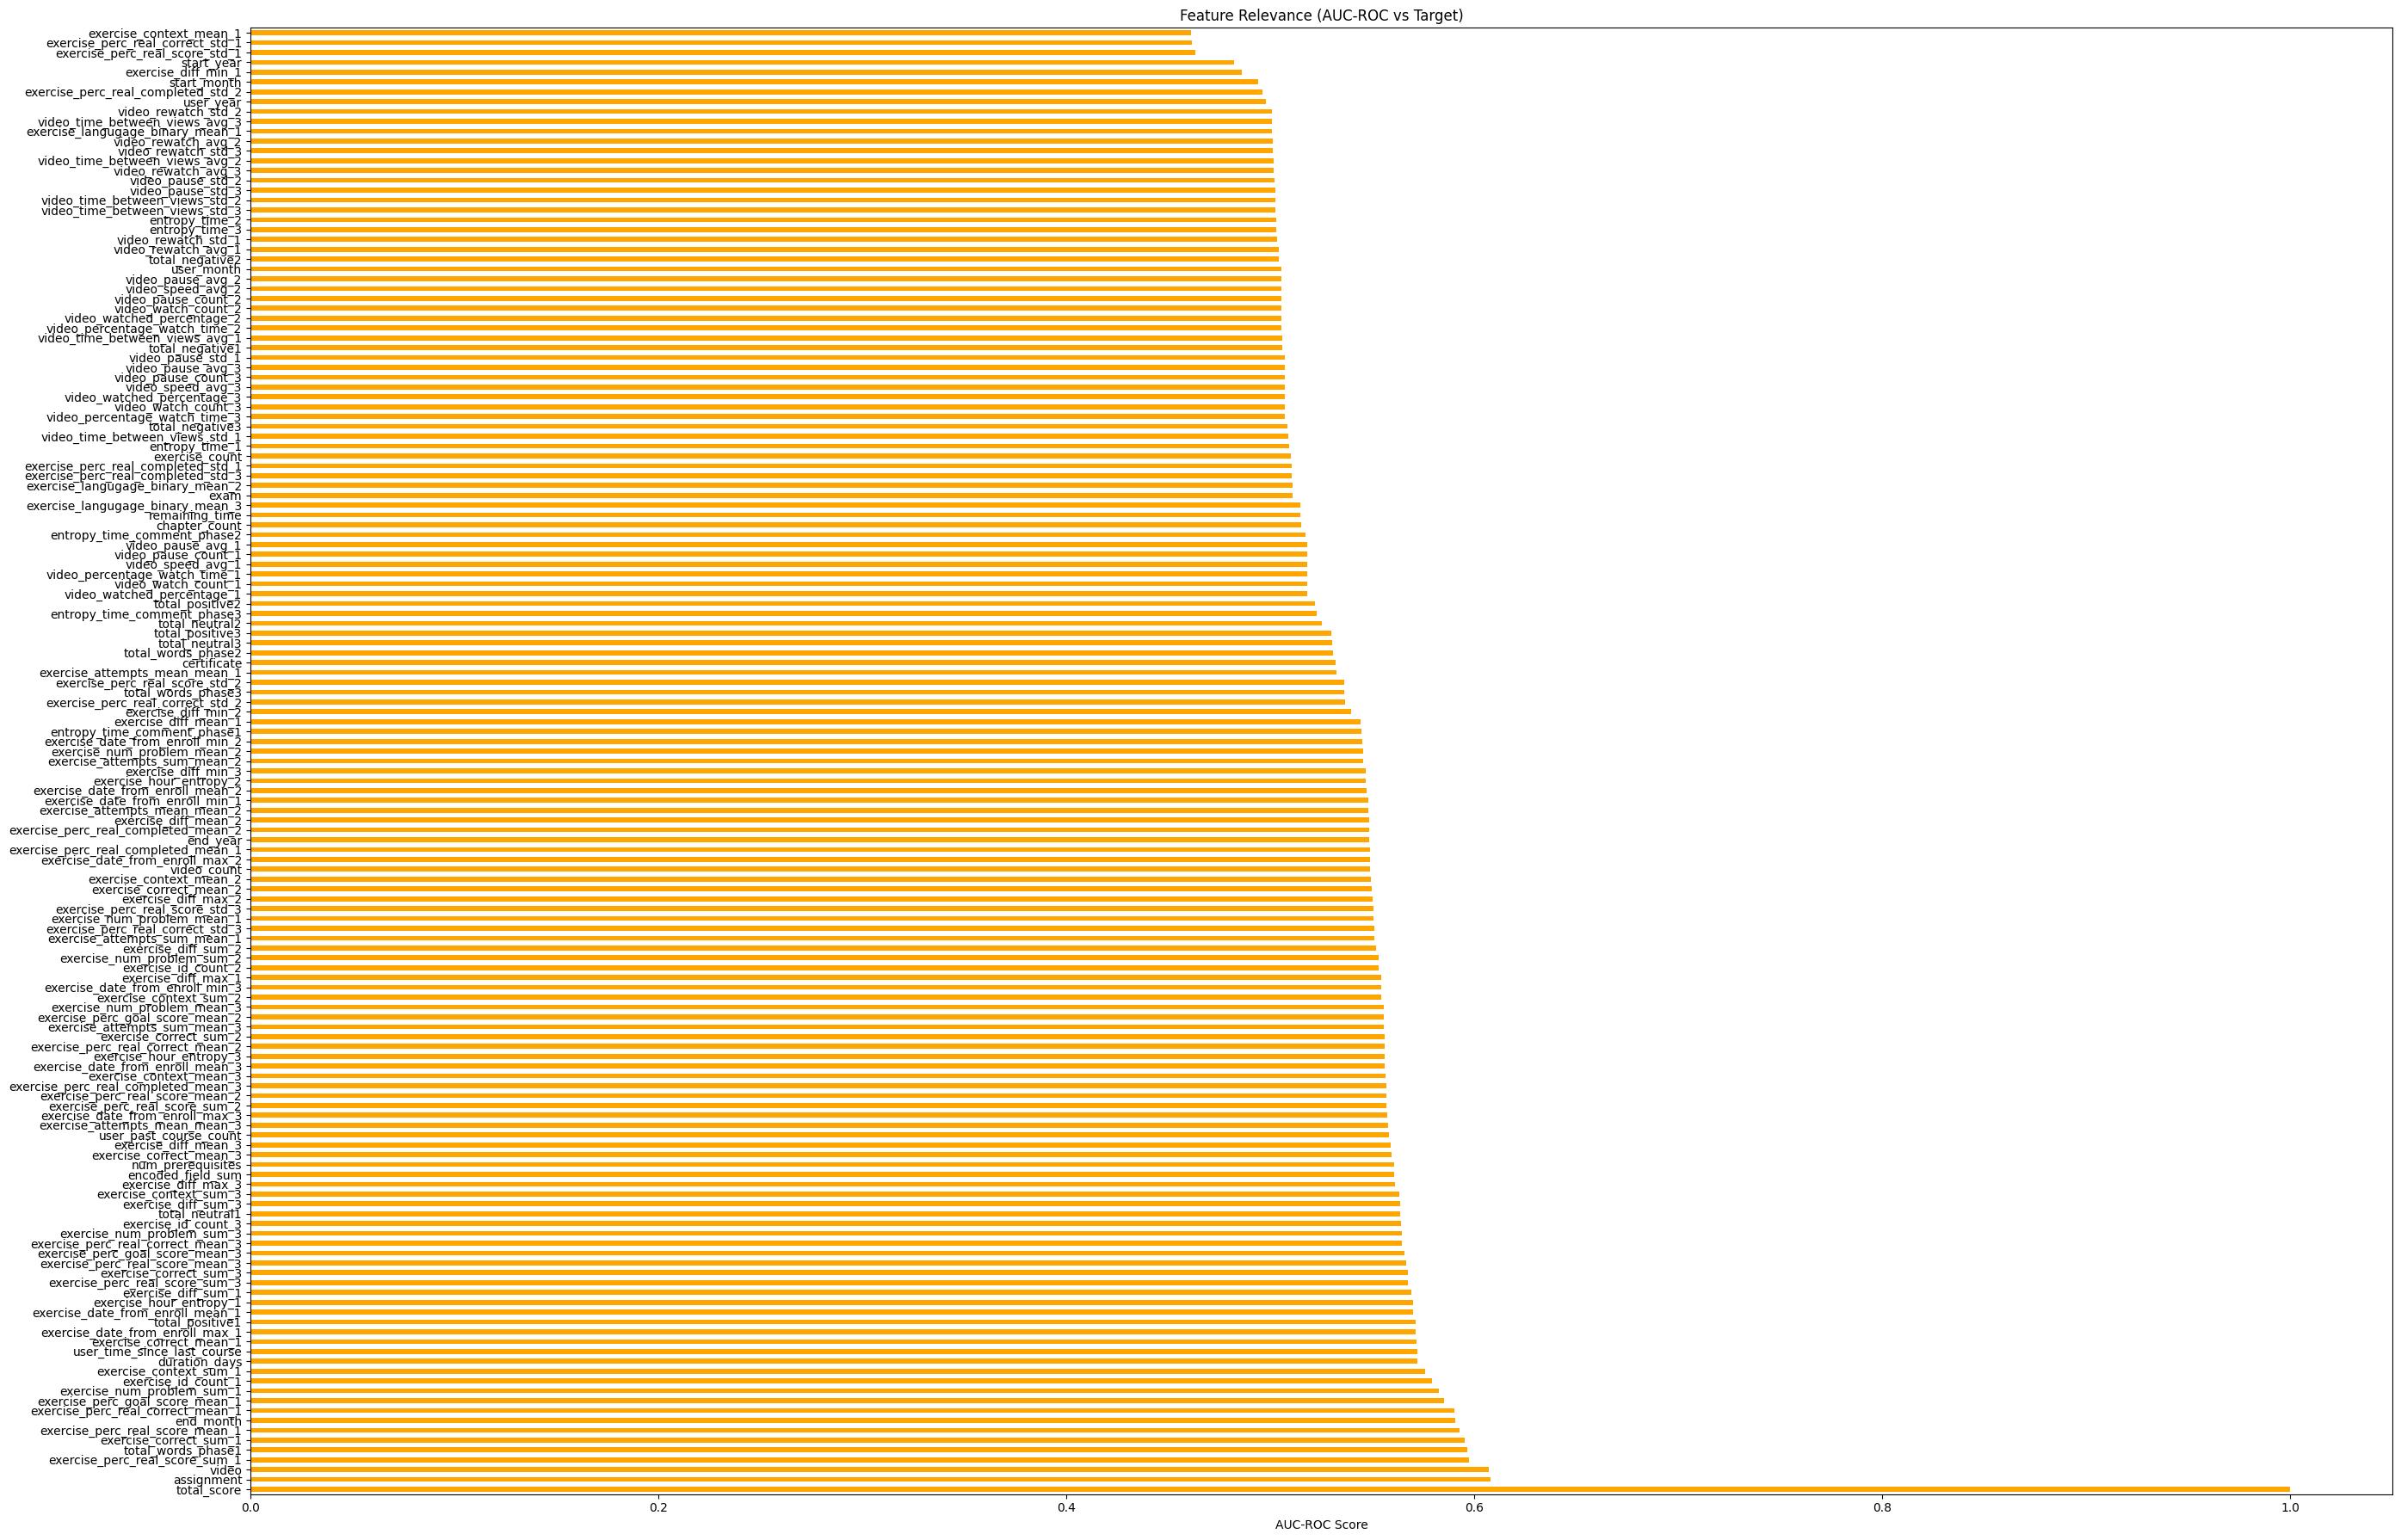

In [23]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np


target_col = 'label_encoded'  # sửa lại tên nếu khác

# Loại bỏ dòng null
df3_clean = df3.dropna()

# Chia X và y
X = df3_clean.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
y = df3_clean[target_col]

# Binarize target nếu không phải nhị phân
if len(np.unique(y)) > 2:
    from sklearn.preprocessing import label_binarize
    y_bin = label_binarize(y, classes=np.unique(y))[:, 0]
else:
    y_bin = y

# Tính AUC cho từng cột
auc_scores = {}
for col in X.columns:
    X_col = X[[col]]
    try:
        model = LogisticRegression()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        aucs = []

        for train_idx, test_idx in cv.split(X_col, y_bin):
            model.fit(X_col.iloc[train_idx], y_bin[train_idx])
            probs = model.predict_proba(X_col.iloc[test_idx])[:, 1]
            auc = roc_auc_score(y_bin[test_idx], probs)
            aucs.append(auc)

        auc_scores[col] = np.mean(aucs)
    except Exception as e:
        auc_scores[col] = np.nan
        print(f"⚠️ AUC fail on column {col}: {e}")

# In kết quả
sorted_auc = pd.Series(auc_scores).sort_values(ascending=False)
print("📊 AUC-ROC per feature (Relevance):")
print(sorted_auc)

# (Tùy chọn) Biểu đồ
import matplotlib.pyplot as plt
sorted_auc.plot(kind='barh', figsize=(28, 18), color='orange')
plt.title('Feature Relevance (AUC-ROC vs Target)')
plt.xlabel('AUC-ROC Score')
plt.tight_layout()
plt.show()


# Phase 4

In [24]:
# Đọc dữ liệu
df4 = pd.read_csv('/kaggle/input/final-data/phase4/user_train_phase_4.csv')

🔍 Completeness theo từng object (ví dụ 10 dòng đầu):
0     99.492386
1    100.000000
2    100.000000
3    100.000000
4    100.000000
5    100.000000
6    100.000000
7     99.492386
8    100.000000
9    100.000000
dtype: float64

📊 Completeness toàn bộ dataset: 99.73%


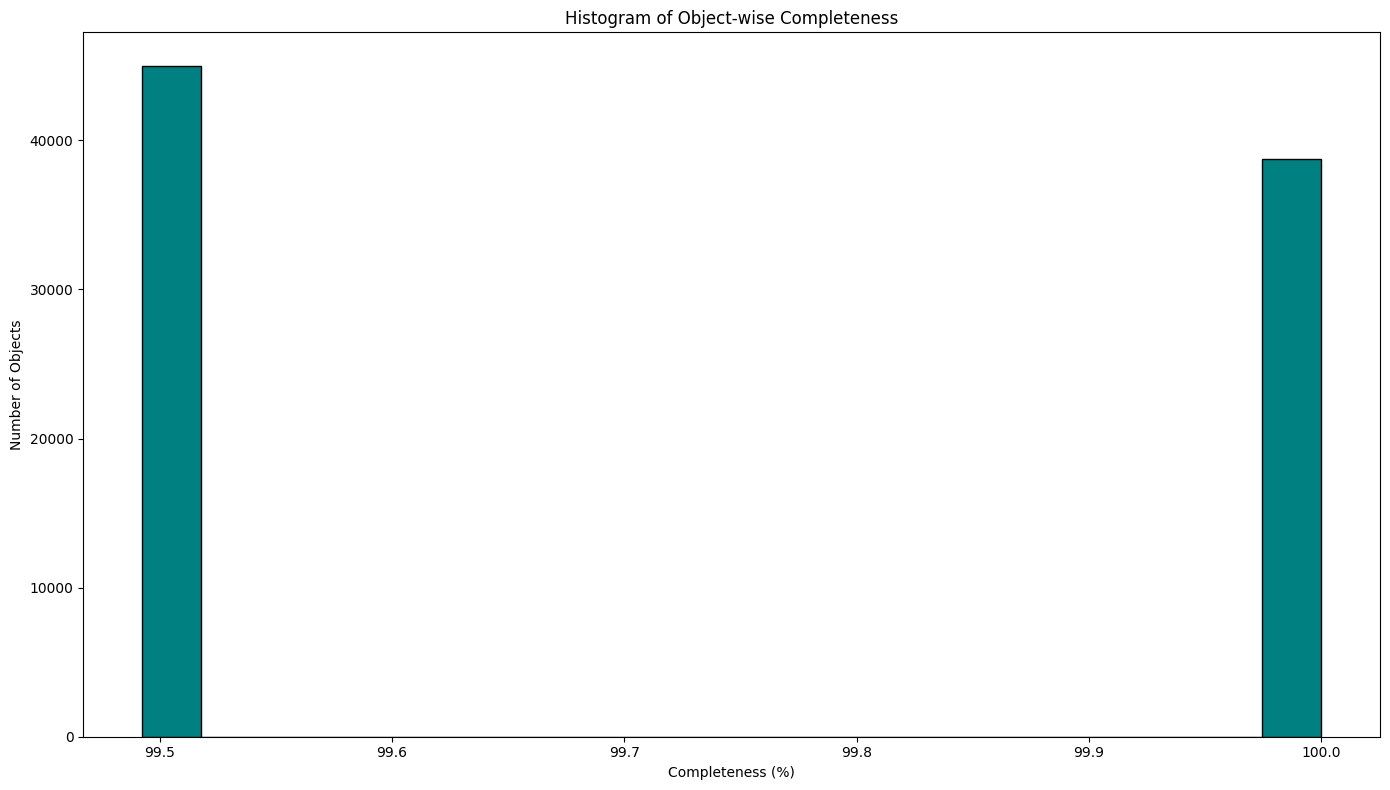

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Tổng số thuộc tính (cột)
total_columns = df4.shape[1]

# a. Tính completeness cho từng object (theo dòng)
object_completeness = df4.notnull().sum(axis=1) / total_columns * 100

# b. Tính completeness toàn bộ dataset
dataset_completeness = object_completeness.mean()

# ✅ In kết quả
print("🔍 Completeness theo từng object (ví dụ 10 dòng đầu):")
print(object_completeness.head(10))

print(f"\n📊 Completeness toàn bộ dataset: {dataset_completeness:.2f}%")

# (Tùy chọn) Vẽ biểu đồ histogram
plt.figure(figsize=(14, 8))
plt.hist(object_completeness, bins=20, color='teal', edgecolor='black')
plt.title('Histogram of Object-wise Completeness')
plt.xlabel('Completeness (%)')
plt.ylabel('Number of Objects')
plt.tight_layout()
plt.show()


📊 AUC-ROC per feature (Relevance):
total_score                           1.000000
assignment                            0.604797
video                                 0.604449
exercise_perc_real_score_sum_1        0.602786
exercise_correct_sum_1                0.601046
                                        ...   
exercise_perc_real_completed_std_2    0.496867
start_year                            0.489693
exercise_perc_real_score_std_1        0.460082
exercise_perc_real_correct_std_1      0.457988
exercise_context_mean_1               0.455485
Length: 192, dtype: float64


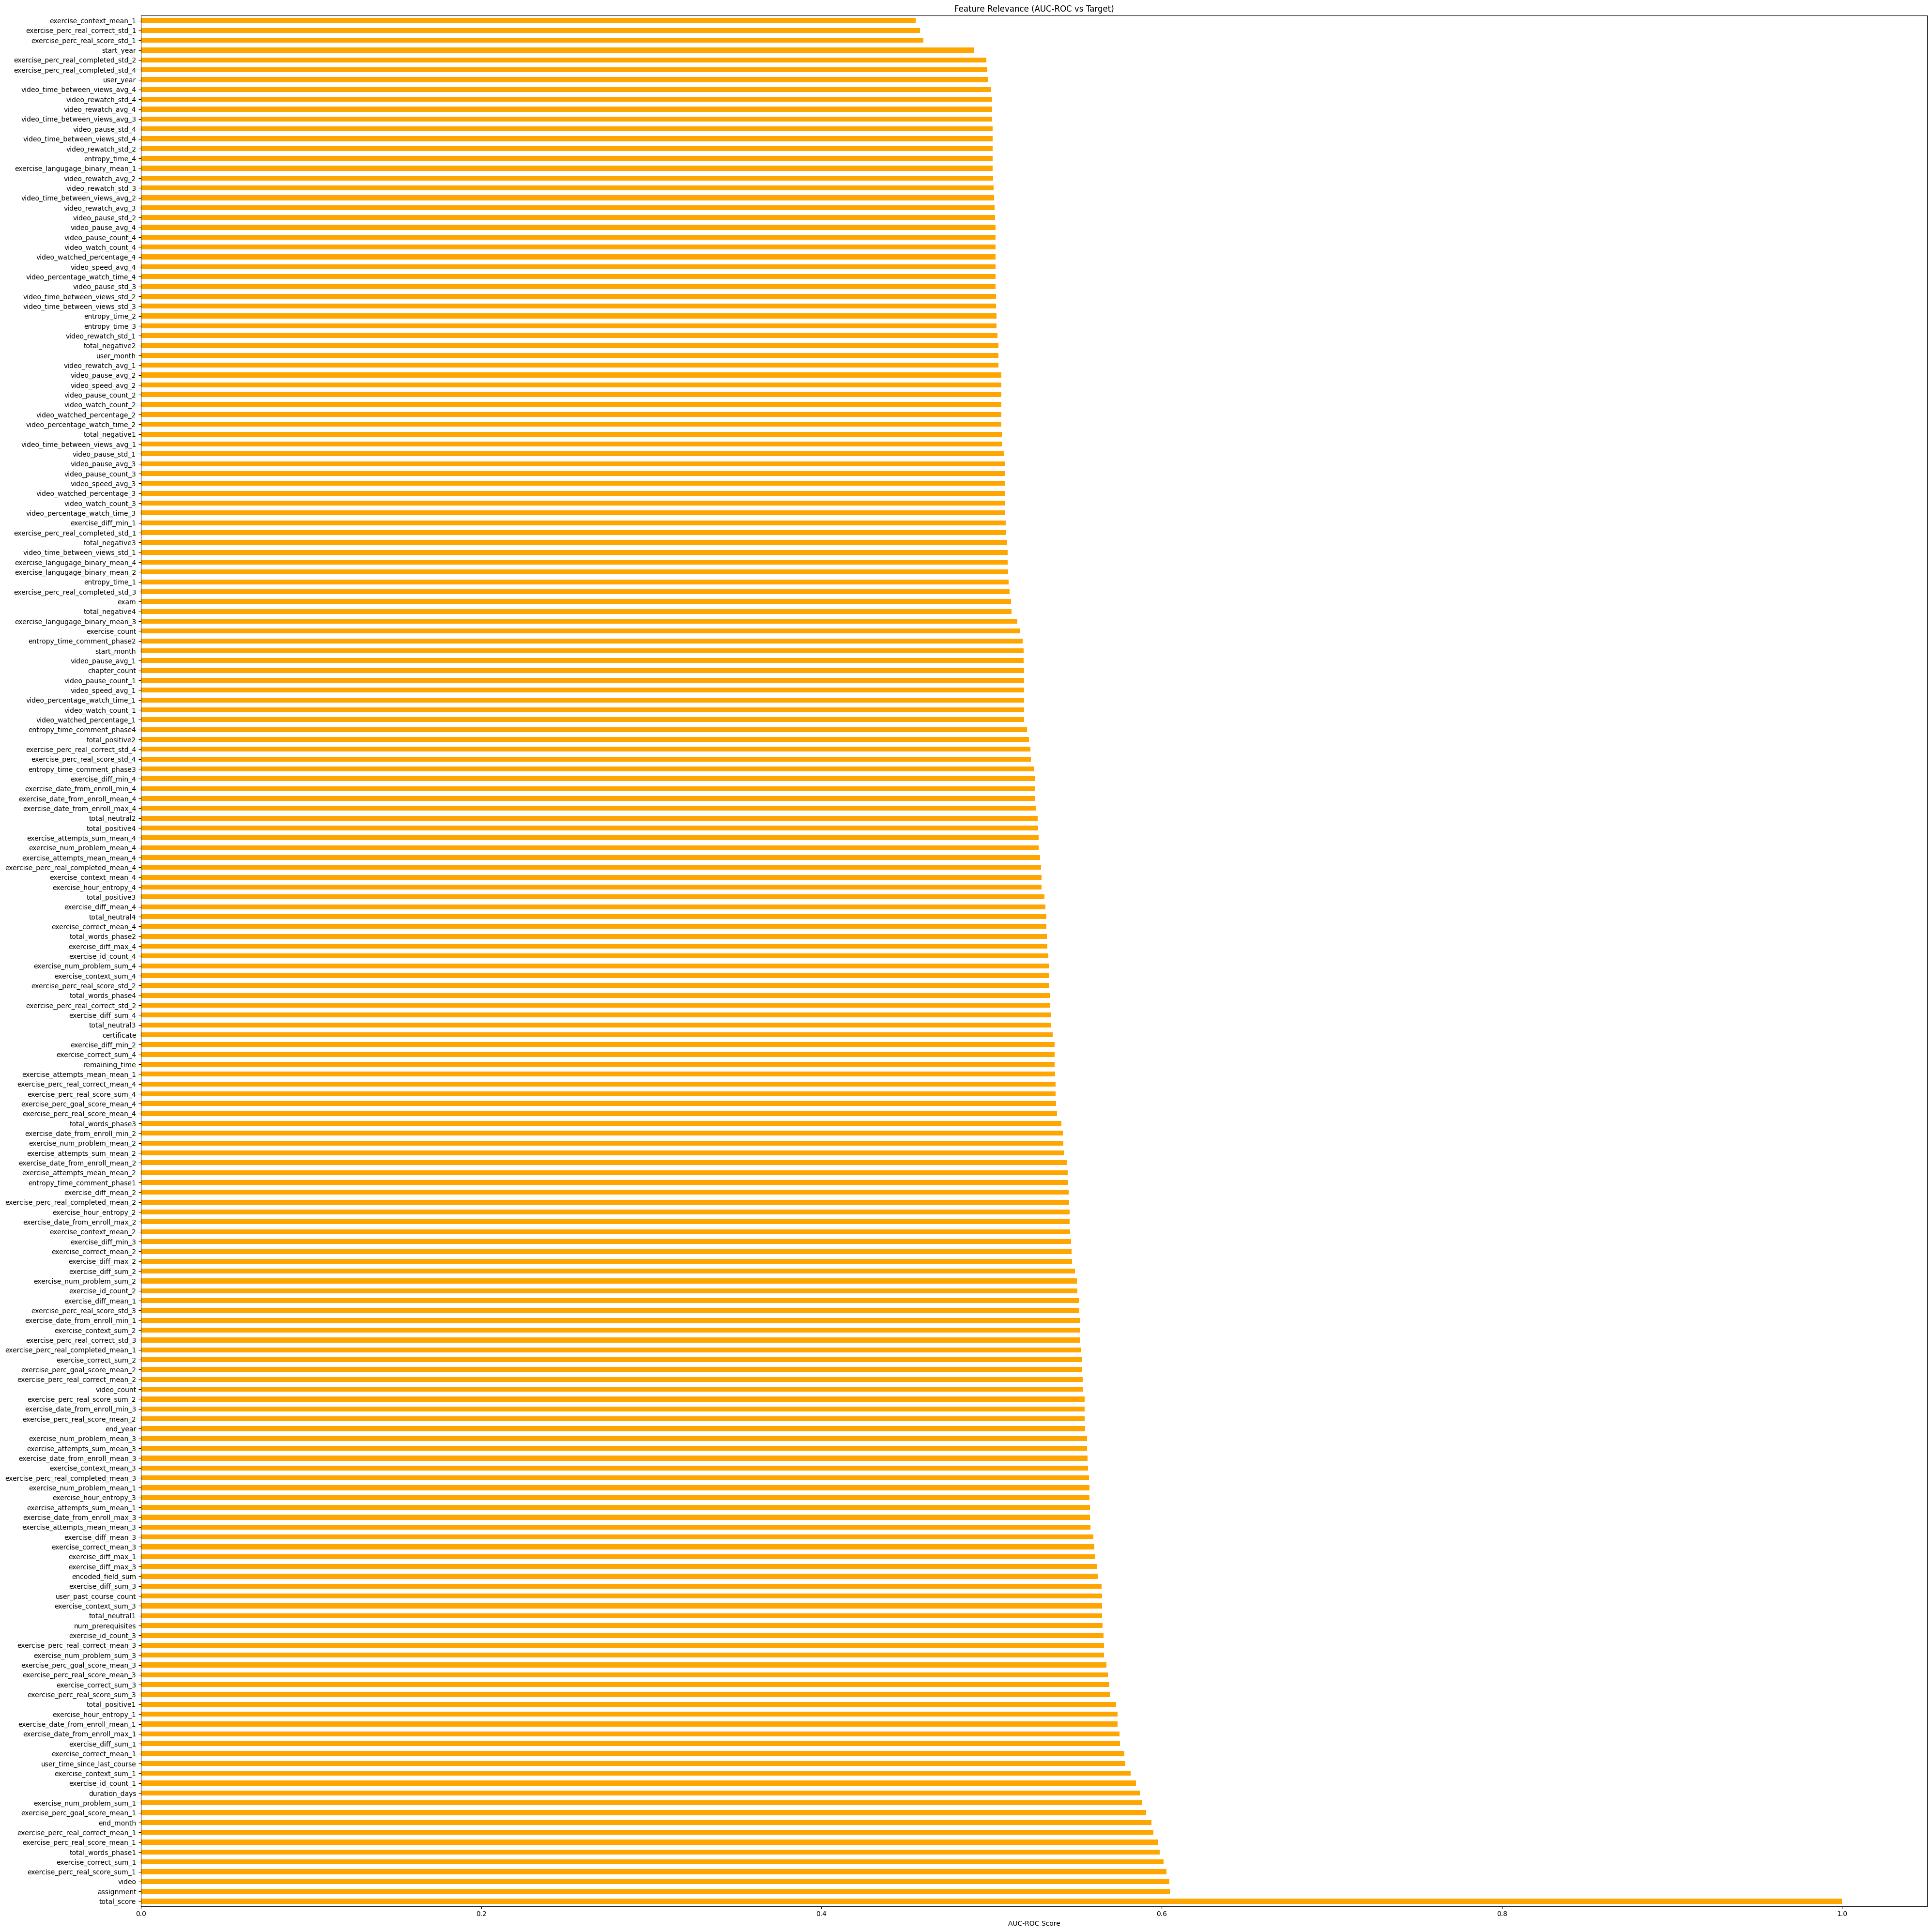

In [29]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np


target_col = 'label_encoded'  # sửa lại tên nếu khác

# Loại bỏ dòng null
df4_clean = df4.dropna()

# Chia X và y
X = df4_clean.select_dtypes(include='number').drop(columns=[target_col], errors='ignore')
y = df4_clean[target_col]

# Binarize target nếu không phải nhị phân
if len(np.unique(y)) > 2:
    from sklearn.preprocessing import label_binarize
    y_bin = label_binarize(y, classes=np.unique(y))[:, 0]
else:
    y_bin = y

# Tính AUC cho từng cột
auc_scores = {}
for col in X.columns:
    X_col = X[[col]]
    try:
        model = LogisticRegression()
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        aucs = []

        for train_idx, test_idx in cv.split(X_col, y_bin):
            model.fit(X_col.iloc[train_idx], y_bin[train_idx])
            probs = model.predict_proba(X_col.iloc[test_idx])[:, 1]
            auc = roc_auc_score(y_bin[test_idx], probs)
            aucs.append(auc)

        auc_scores[col] = np.mean(aucs)
    except Exception as e:
        auc_scores[col] = np.nan
        print(f"⚠️ AUC fail on column {col}: {e}")

# In kết quả
sorted_auc = pd.Series(auc_scores).sort_values(ascending=False)
print("📊 AUC-ROC per feature (Relevance):")
print(sorted_auc)

# (Tùy chọn) Biểu đồ
import matplotlib.pyplot as plt
sorted_auc.plot(kind='barh', figsize=(40, 40), color='orange')
plt.title('Feature Relevance (AUC-ROC vs Target)')
plt.xlabel('AUC-ROC Score')
plt.tight_layout()
plt.show()
